In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow import keras

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt

import skimage as sk
from skimage import io
from skimage import feature
from skimage import filters
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

#from google.colab import files 
#from google.colab import drive 

from PIL import Image
from math import sqrt

from io import BytesIO # For reading images from Github URL

# WRITE CODE FOR IMAGES TO BE PULLED OFF GITHUB

In [4]:
keras.__version__
tf.__version__

NameError: name 'keras' is not defined

In [5]:
#Attempt1: does not work
#def pull_img_from_github(url):
#    response = requests.get(url)
#    img = Image.open(BytesIO(response.content))
#    plt.imshow(img)
#    plt.show()


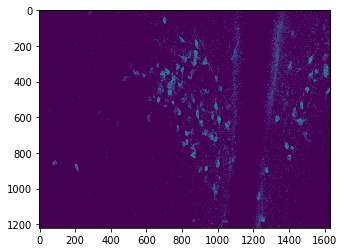

In [6]:
# PVN IMAGE
#img_pvn1 = Image.open('PVN.png') #Rutuja use this one
img = sk.io.imread('PVN.png') #I changed this by cutting out Research folder this is for mac
image_gray = rgb2gray(img)
plt.imshow(image_gray)

# Find all Blobs and Label Training Data

#### REFINE THIS SO IT's JUST BLOBS DOG

/Users/myang/opt/anaconda2/envs/tf/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/Users/myang/opt/anaconda2/envs/tf/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/Users/myang/opt/anaconda2/envs/tf/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/Users/myang/opt/anaconda2/envs/tf/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


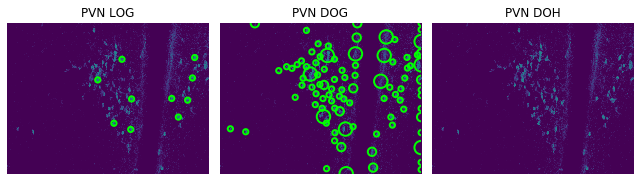

In [7]:
#SAMPLE IMAGE

# Compute radii in the 3rd column.
#blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
#threshold=.1
blobs_log_pvn = blob_log(image_gray, min_sigma=15, max_sigma=50, num_sigma=10, threshold=.1)
blobs_log_pvn[:, 2] = blobs_log_pvn[:, 2] * sqrt(2)

blobs_dog_pvn = blob_dog(image_gray, min_sigma=15, max_sigma=50, threshold=.1)
blobs_dog_pvn[:, 2] = blobs_dog_pvn[:, 2] * sqrt(2)

blobs_doh_pvn = blob_doh(image_gray, min_sigma=15, max_sigma=50, threshold=.1)
blobs_doh_pvn[:, 2] = blobs_doh_pvn[:, 2] * sqrt(2)

blobs_list = [blobs_log_pvn, blobs_dog_pvn, blobs_doh_pvn]
colors = ['lime', 'lime', 'lime']
titles = ['PVN LOG', 'PVN DOG', 'PVN DOH']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [8]:
len(blobs_dog_pvn)

92

#### CHANGE BELOW TO IGNORE IT AND STORE IT (EDGES AND CORNERS)

In [9]:
# This section of code finds all the blobs and puts a 70x70 pixel square around them 
# then stores them in a list 

bounding_box_list = []
irregular_cells = []
for blob in blobs_dog_pvn:
  x, y, r, = blob 
  y = int(y.round(0))
  x = int(x.round(0))
  left_bound = x-70
  right_bound = x+70
  upper_bound = y+70
  lower_bound = y-70
  bounding_box = image_gray[left_bound:right_bound,lower_bound:upper_bound]
  #Ignore this code. Just a temp solution to the images not being the same size
  if len(bounding_box) != 140 or len(bounding_box[0]) != 140:# edge or corner
    irregular_cells.append(bounding_box)
  else: 
    bounding_box_list.append(bounding_box) 


(140, 140)

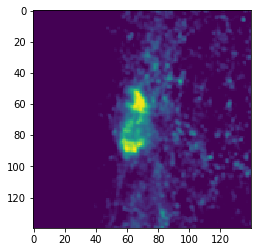

In [10]:
# let's grab one cell as an example
plt.imshow(bounding_box_list[0])
bounding_box_list[0].shape

In [11]:
# we need a training set, so let's grab random items from the entire blob list 
training_images = random.sample(bounding_box_list,10)

In [12]:
test_images = random.sample(bounding_box_list,10) # test set 

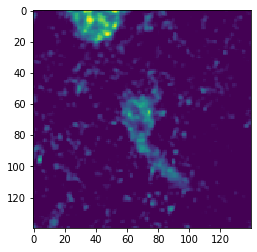

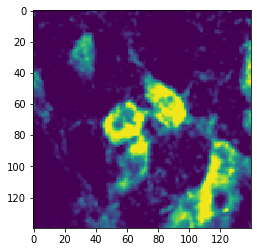

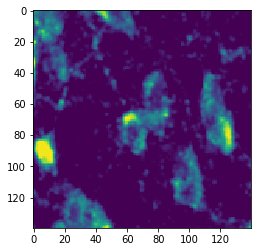

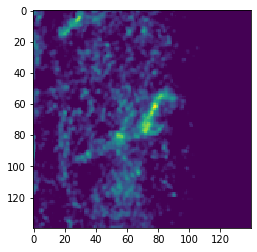

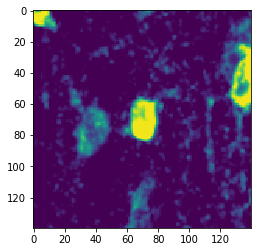

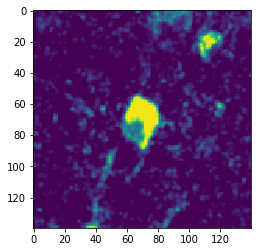

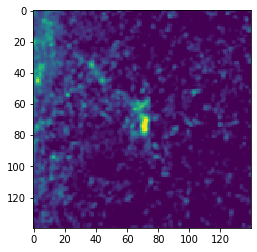

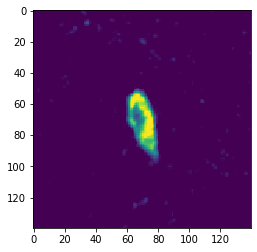

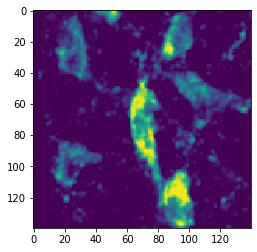

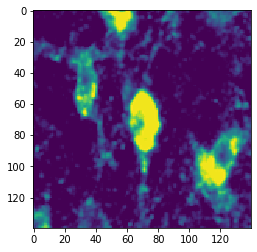

In [13]:
# now we need to label our training data, press 'c' for cell, or any other key for other.

# matplob inline DOESNT WORK in colaboratory (of course), so this needs to be downloaded and run as ipynb I think... 
# in order to include the user input 

%matplotlib inline

training_labels = []


def press(event):
    global keypress
    global vals
        
    if event.key == 'c':
        training_labels.append('cell')
    else: 
        training_labels.append('other')
    

    if len(training_labels) == 2:
        fig.canvas.mpl_disconnect(cid)

    return training_labels


for blobss in range(10):
    
    fig = plt.figure()
    plt.imshow(training_images[blobss])
    cid = fig.canvas.mpl_connect('key_press_event', press)


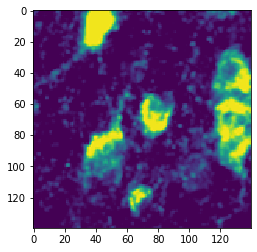

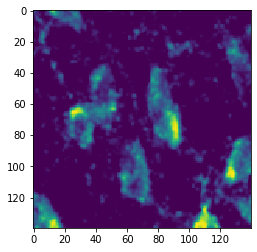

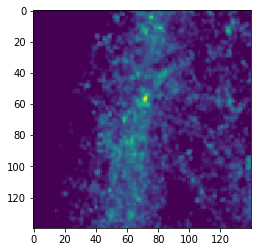

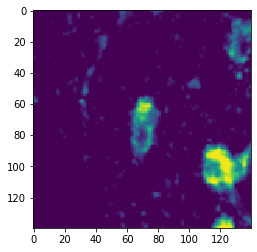

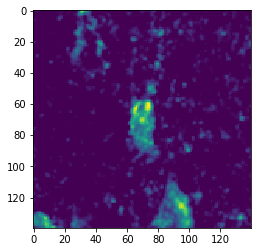

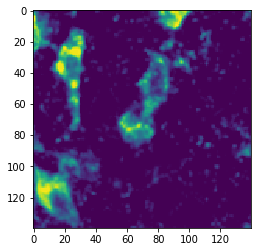

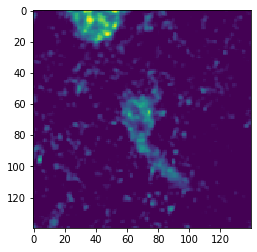

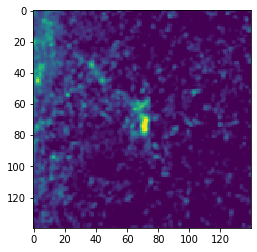

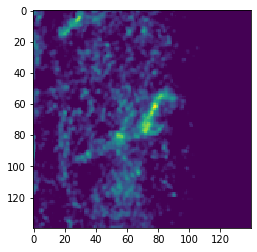

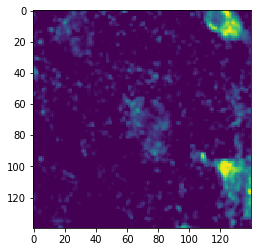

In [14]:
# SAME PROCESS EXCEPT FOR TESTING DATA

%matplotlib inline

testing_labels = []


def press(event):
    global keypress
    global vals
        
    if event.key == 'c':
        testing_labels.append('cell')
    else: 
        testing_labels.append('other')
    

    if len(testing_labels) == 2:
        fig.canvas.mpl_disconnect(cid)

    return testing_labels


for blobss in range(10):
    
    fig = plt.figure()
    plt.imshow(test_images[blobss])
    cid = fig.canvas.mpl_connect('key_press_event', press)

In [24]:
test_images = np.array(test_images)
training_images = np.array(training_images)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)
# let's check our labels
print(test_images.shape)               
print(training_images.shape)
print(training_labels.shape)
print(testing_labels.shape)

(10, 140, 140)
(10, 140, 140)
(0,)
(0,)


#### ADD IN ACCURACY / STORING INTO CSV or XCEL CODE 

# Begin keras code

### what categories do we want to use? should be decided before selecting training images

In [17]:
# need to set pixel values to a 0-1 scale
training_images = training_images / 255.0
test_images = test_images / 255.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

#### What are the best layers to use? 

In [18]:
#Load a previously saved model
#checkpoint_path will be a path to the checkpoint from the current directory, ie 'training_test/cp.ckpt'
def load_weights(model,checkpoint_path):
  model.load_weights(checkpoint_path)

In [19]:
#Build model(if model has not already been built/fitted)
def build_model():
  # Need to build the model, why 128??
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(140, 140)),
      tf.keras.layers.Dense(128, activation='relu'), # WHAT OTHER LAYERS SHOULD WE BE ADDING??
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3)
  ])
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [20]:
#Add training data to model
#Params: 
#model: the model to add to
#checkpoint_path: user defined path in case we would like to revert to this version
#training_images: training images
#training_labels: training labels
#epochs: number of epochs to use
def add_to_model(model, checkpoint_path, training_images, training_labels, num_epochs):
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
  model.fit(training_images, 
          training_labels,  
          epochs=num_epochs,
          callbacks=[cp_callback]) 
  

### code that calls these above functions as an example

In [25]:
# OR USE THIS Proof-of-Concept

 # Need to build the model, why 128??
model = build_model()
add_to_model(model,"Checkpoints/model_v1",training_images,training_labels,300)

  

ValueError: Input arrays should have the same number of samples as target arrays. Found 10 input samples and 0 target samples.

In [ ]:
# make predictions 

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0]) #try a prediction out [notice how test labels are not involved]

In [ ]:
test_labels[0] #try a prediction out [notice how test labels are not involved]

# Plot results

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(1))
  plt.yticks([])
  thisplot = plt.bar(range(1), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
#https://www.tensorflow.org/tutorials/keras/classification
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()